# Pydicom access

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pydicom
image01 = "cxrs/dicom-48678/img01.dcm"
image02 = "cxrs/dicom-48678/img02.dcm"
image11 = "cxrs/dicom-49852/img11.dcm"
image12 = "cxrs/dicom-49852/img12.dcm"
image13 = "cxrs/dicom-49852/img13.dcm"
image14 = "cxrs/dicom-49852/img14.dcm"
with open(image01, 'rb') as infile:
    ds = pydicom.dcmread(infile)

In [2]:
#2D scan 1
dataset = pydicom.dcmread(image01)
dataset2 = pydicom.dcmread(image02)


#2D scan 2
dataset3 = pydicom.dcmread(image11)
dataset4 = pydicom.dcmread(image12)
dataset5 = pydicom.dcmread(image13)
dataset6 = pydicom.dcmread(image14)





if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))

img1 = dataset.pixel_array  # this is the image data
img2 = dataset2.pixel_array  # this is the image data
img3 = dataset3.pixel_array  # this is the image data
img4 = dataset4.pixel_array
img5 = dataset5.pixel_array  # this is the image data
img6 = dataset6.pixel_array
#plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)



Image size.......: 2866 x 2154, 8206566 bytes


In [25]:
lut = pydicom.pixels.apply_voi_lut(img1, dataset)
#clut = pydicom.pixels.apply_color_lut(img1, dataset)
modular_lut = pydicom.pixels.apply_modality_lut(img1, dataset)


modular lut min intensity: 49152.0
modular lut max intensity: 65535.0
voi lut min intensity: 0.0
voi lut max intensity: 65535.0


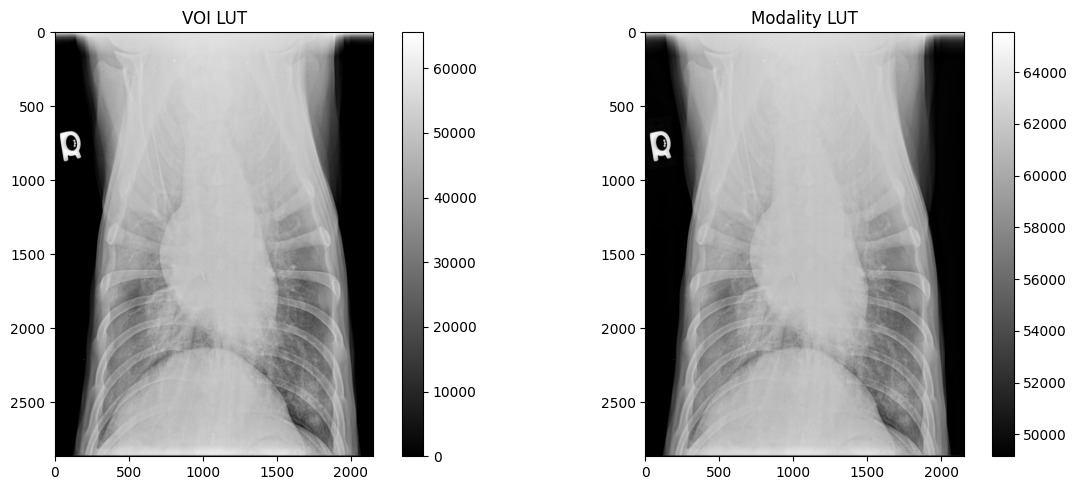

In [23]:
print(f"modular lut min intensity: {np.min(modular_lut)}")
print(f"modular lut max intensity: {np.max(modular_lut)}")
print(f"voi lut min intensity: {np.min(lut)}")
print(f"voi lut max intensity: {np.max(lut)}")
# Plot side-by-side with colorbars
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: VOI LUT
im0 = ax[0].imshow(lut, cmap='gray')
ax[0].set_title('VOI LUT')
fig.colorbar(im0, ax=ax[0])

# Second subplot: Modality LUT
im1 = ax[1].imshow(modular_lut, cmap='gray')
ax[1].set_title('Modality LUT')
fig.colorbar(im1, ax=ax[1])

plt.tight_layout()
plt.show()

In [7]:
#Save the images as numpy arrays
import os
from PIL import Image
output_dir = "imagesdicom"
os.makedirs(output_dir, exist_ok=True)
#np.save(os.path.join(output_dir, "img1.npy"), img1)
#np.save(os.path.join(output_dir, "img2.npy"), img2)
for idx, img in enumerate([img1, img2, img3, img4, img5, img6], start=1):
    # Normalize to 0-255 and convert to uint8 for JPEG saving
    img_norm = ((img - img.min()) / (img.max() - img.min()) * 255).astype(np.uint8)
    im = Image.fromarray(img_norm)
    im.save(os.path.join(output_dir, f"pydicom1_img{idx}.jpg"))




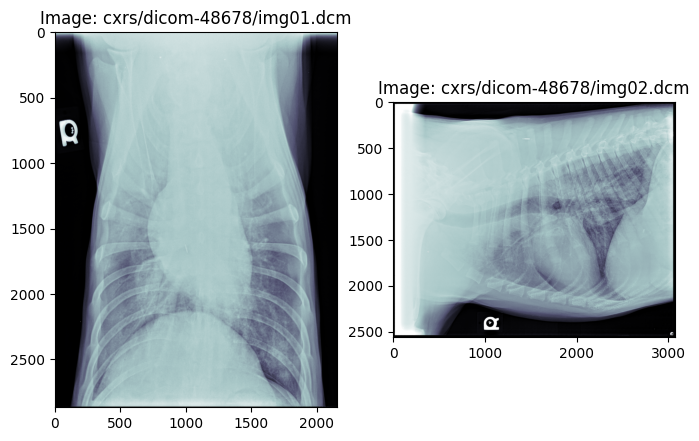

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
axs[0].imshow(img1, cmap=plt.cm.bone)

axs[0].set_title("Image: {0}".format(image01))
axs[1].imshow(img2, cmap=plt.cm.bone)
axs[1].set_title("Image: {0}".format(image02))
#fig.colorbar(ax=axs[0], mappable=axs[0].images[0], orientation='vertical', fraction=0.1)
plt.show()

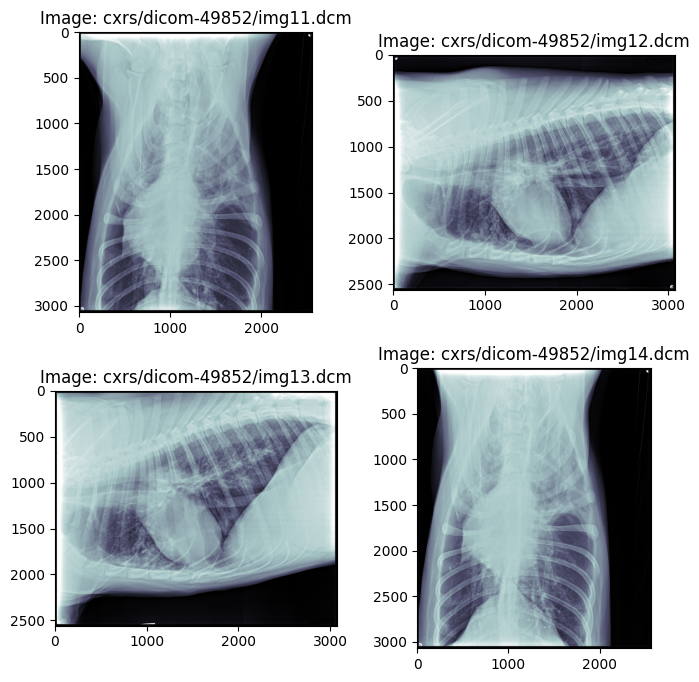

In [10]:
fig,ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(img3, cmap=plt.cm.bone)
ax[0, 0].set_title("Image: {0}".format(image11))
ax[0, 1].imshow(img4, cmap=plt.cm.bone)
ax[0, 1].set_title("Image: {0}".format(image12))
ax[1, 0].imshow(img5, cmap=plt.cm.bone)
ax[1, 0].set_title("Image: {0}".format(image13))
ax[1, 1].imshow(img6, cmap=plt.cm.bone)
ax[1, 1].set_title("Image: {0}".format(image14))
plt.show()